In [206]:
import time

In [207]:
import random
from statistics import mean
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import urllib.request as url
import numpy as np
import scanpy as sc
import pandas as pd
import numba
import sklearn
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin

class MiniBatchKMeans:
    def __init__(self, k=8, inits=300, max_iterations=300, tol=1e-3, batch_size=100):
        self._k = k
        self._inits = inits
        self._max_iterations = max_iterations
        self._tol = tol
        self._batch_size = batch_size
        
    def create_batch(self, data): 
        data_batch = np.random.choice(range(len(data)), self._batch_size, replace=False)
        return data[data_batch]
    
    #def plusplus(self, data): #initalize von k++ (?)
     #   dot = np.random.choice(len(data), self.k, replace=False) #self.k dazu?
      #  clusters = np.array([data[dot]])
       # pointer = np.array([])
        #for i in range (k-1):
         #   D = np.array([])
            
          #  for j in range (len(data)):
           #     D = np.append(D,np.min(np.sum((data[j]-clusters)**2, axis = 1)))
                
            #pointer = np.append(pointer, D, axis = 0) 
            
            #p = D/np.sum(D)
            #cummulative_p = np.cumsum(p)
            
            #r = random.random()
            #ind = np.where(cummulative_p >= r)[0][0]
            
            #clusters = np.append(clusters,[data[ind]], axis = 0)
        #return data[clusters], np.zeros(self.k)

    def initialize(self, data): 
        indices = np.random.choice(range(len(data)), self._k, replace=False)
        return data[indices], np.zeros(self._k)
 
    def expectation(self, data, centroids): 
        centroids = np.expand_dims(centroids, axis=1)
        data = np.expand_dims(data, axis=0)
        metric = np.linalg.norm(centroids - data, axis=2)
        return np.argmin(metric, axis=0)

    @staticmethod
    @numba.jit(nopython=True)
    def _maximization_aux(data, assignments, centroids, centroid_count): #verschiebt die centroids richtung clustermittelpunkt mit lr
        update = centroids.copy()
        for idx, assignment in enumerate(assignments):
            data_point = data[idx]
            centroid_count[assignment] += 1
            lr = 1 / centroid_count[assignment] #learning rate
            update[assignment] = update[assignment] * (1 - lr) + data_point * lr
        return update
 
    def maximization(self, data, assignments, centroids, centroid_count): 
        return MiniBatchKMeans._maximization_aux(data, assignments, centroids, centroid_count)
 
    def final_assignments(self, data, centroids): 
        assignments = []
        for idx in range(len(data) // self._batch_size + 1):
            start = idx * self._batch_size
            stop = min(idx * self._batch_size + self._batch_size, len(data))
            sub_result = self.expectation(data[start:stop], centroids)
            assignments.append(sub_result)
        return np.concatenate(assignments, axis=0)

    def fit(self, data): #alles zusammen
        centroids, counts = self.initialize(data)
        
        old_centroids = None
        for idx in range(self._max_iterations):
            old_centroids = centroids.copy()
            
            batch = self.create_batch(data)
            assignments = self.expectation(batch, centroids)
            centroids = self.maximization(batch, assignments, centroids, counts)
            
            if np.linalg.norm(centroids - old_centroids) < self._tol:
                break

        result = self.final_assignments(data, centroids)
                
        return centroids, result


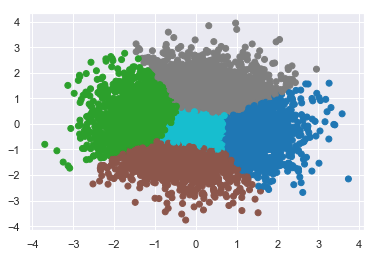

In [209]:
kmeansMB = MiniBatchKMeans(k=5)
data_1 = np.random.normal(0, 1, (10000, 2))

centroids, assignments = kmeansMB.fit(data_1)
plt.scatter(data_1[:, 0], data_1[:, 1], c=assignments, cmap="tab10")

In [87]:
data_1.shape

(10000, 2)

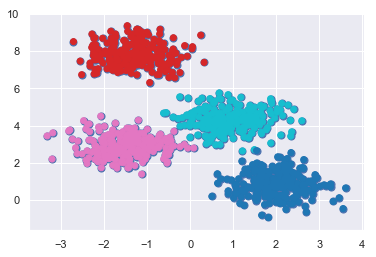

In [210]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs #random data generator
 
my_tuple = X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

kmeansMB = MiniBatchKMeans(k=4)
data_2 = X
type(data_2)
centroids, assignments = kmeansMB.fit(data_2)
plt.scatter(data_2[:, 0], data_2[:, 1], c=assignments, cmap="tab10")


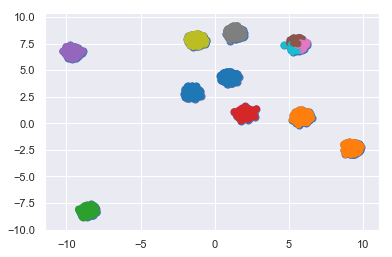

In [187]:
my_tuple = X, y_true = make_blobs(n_samples=10000, centers=10,
                       cluster_std=0.20, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

kmeansMB = MiniBatchKMeans(k=10)
data_3 = X
type(data_3)
centroids, assignments = kmeansMB.fit(data_3)
plt.scatter(data_3[:, 0], data_3[:, 1], c=assignments, cmap="tab10")

In [143]:
from sklearn.datasets import load_iris
iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data']],
                     columns= iris['feature_names'])

data_4pre = data1.as_matrix(columns=None) 
data1.head()

C:\Users\Marilena\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


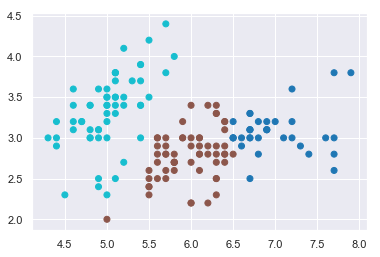

In [188]:
kmeansMB = MiniBatchKMeans(k=3)
data_4 = data_4pre[:,0:2]

centroids, assignments = kmeansMB.fit(data_4)
plt.scatter(data_4[:, 0], data_4[:, 1], c=assignments, cmap="tab10")

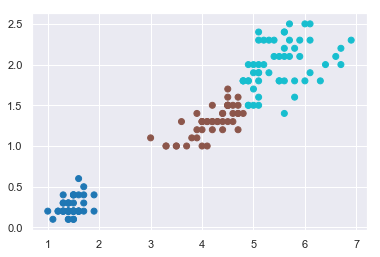

In [190]:
kmeansMB = MiniBatchKMeans(k=3)

data_5 = data_4pre[:,2:4]

centroids, assignments = kmeansMB.fit(data_5)
plt.scatter(data_5[:, 0], data_5[:, 1], c=assignments, cmap="tab10")

C:\Users\Marilena\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: DataConversionWarning: Data with input dtype float32 were all converted to float64 by the scale function.


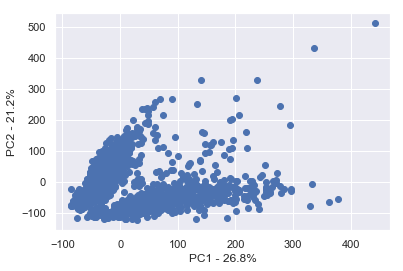

In [148]:
class Data():
    """Encapsulates data for clustering."""
    def __init__(self, data):
        self.data = tarfile.open(url.urlretrieve(data, filename=None)[0]).extractall()
        self.source = './filtered_gene_bc_matrices/hg19/'
        self.matrix = sc.read_10x_mtx(self.source, var_names='gene_symbols', cache=True)
    
    def to_matrix(self):                                # converts to scanpy matrix 
        return self.matrix
        
    def to_array(self):                              # converts data to numpy arrays
        self.matrix.var_names_make_unique()
        ar_data = self.matrix._X.todense().getA()
        return ar_data
    
    def to_df(self):                                 # converts data to pandas dataframe
        df_data = self.matrix.to_df()
        return df_data
        
    def col_names(self):                              #returns column names as a list
        columns = []
        with open(self.source + "genes.tsv") as file:
            reader = csv.reader(file, delimiter='\t')
            for row in reader:
                columns.append(row[1])
            return columns

    def row_names(self):                               #returns row names as a list
        rows = []
        with open(self.source + "barcodes.tsv") as file:
            reader = csv.reader(file, delimiter='\t')
            for row in reader:
                rows.append(row[0]) 
        return rows

PBMC = Data("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")
adata = PBMC.to_matrix()
ar_pbmc = PBMC.to_array()
df_pbmc = PBMC.to_df()
rows = PBMC.row_names()
columns = PBMC.col_names()
columns = np.array(columns)
df_nonzero_variance = df_pbmc[columns[df_pbmc.var() != 0]]

from sklearn.decomposition import PCA
from sklearn import preprocessing
scaled = preprocessing.scale(df_nonzero_variance)
pca = PCA()
pca.fit(df_nonzero_variance)
per_var = np.round(pca.explained_variance_ratio_*100, decimals= 1)
pca_data = pca.transform(df_nonzero_variance)
labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]
pca_df = pd.DataFrame(pca_data, index = PBMC.row_names(), columns= labels )

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))

plt.show()

In [149]:
data_6pre = pca_df.as_matrix(columns=None) 
pca_df.head()

C:\Users\Marilena\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC2691,PC2692,PC2693,PC2694,PC2695,PC2696,PC2697,PC2698,PC2699,PC2700
AAACATACAACCAC-1,-13.054950,39.608418,1.605169,15.121771,-25.894982,-16.023733,-12.276481,-10.058097,-5.799608,9.471936,...,0.010717,-0.066399,-0.046799,-0.175470,0.077095,-0.112745,-0.139416,0.072479,-0.050918,1.120631e-14
AAACATTGAGCTAC-1,48.376497,197.340051,-10.301943,-5.191400,36.708921,30.967111,-11.284774,-17.626568,10.499653,32.525124,...,-0.059142,-0.008126,0.018953,-0.014376,-0.008440,0.023963,-0.022341,0.027181,-0.016514,6.494891e-14
AAACATTGATCAGC-1,7.250422,79.558535,87.015539,-11.343637,44.648200,-9.379911,46.015019,25.423866,-29.018099,-11.747561,...,0.041262,-0.106019,-0.030122,-0.010323,0.006943,-0.051356,-0.043512,0.012119,0.025133,7.232837e-14
AAACCGTGCTTCCG-1,101.243063,-62.090588,1.788325,10.122032,-23.151715,19.754169,-2.923978,36.400817,-32.647645,-13.071553,...,-0.009432,0.021966,-0.052475,-0.005515,0.210976,-0.020752,-0.027073,-0.012013,-0.042405,6.825270e-14
AAACCGTGTATGCG-1,-51.240657,-89.212432,8.749643,25.331917,-11.549378,0.738927,2.120324,-8.450137,10.400779,-2.761009,...,-0.000240,0.123012,-0.180651,0.286439,-0.050002,0.042976,0.064273,-0.004481,0.052203,5.134261e-14


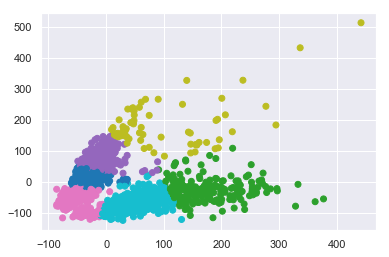

In [191]:
kmeansMB = MiniBatchKMeans(k=6)

data_6 = data_6pre[:,0:2]

centroids, assignments = kmeansMB.fit(data_6)
plt.scatter(data_6[:, 0], data_6[:, 1], c=assignments, cmap="tab10")

und jetzt mit KMeans:

In [199]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
import numba
from numba import njit, jit
from statistics import mean
from sklearn.datasets.samples_generator import make_blobs
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin

class Kmeans(BaseEstimator, ClusterMixin, TransformerMixin):               # Input: processed dataset, Output: clustered data (kmeans, kmeans++)
    def __init__(self, inits=10, k=8, maxit=300, method="++", tol = 1e-3):
        
        self.labels_ = None
        self.cluster_centers_ = None
        self._inits = inits
        self._k = k
        self._maxit = maxit
        self._method = method
        self._tol = tol
       # dot = np.random.choice(range(len(self._data)), self._k, replace=False)
        #self._clusters = self._data[dot]
   

    def fit(self,data):
        self._data = data
        best_clust = float('inf')
        
        for i in (range(self._inits)):
            
            if self._method == "rng": # random centers are choosen
                #print("rng")
                dot = np.random.choice(range(len(self._data)), self._k, replace=False)
                self.cluster_centers_ = self._data[dot]
            elif self._method == "++": # kmeans++ is initiated
                #print("++")
                dot = np.random.choice(len(self._data), replace=False) # random startpunkt
                clusters = np.array([self._data[dot]])
                pointer = np.array([])
                for i in range (self._k-1):
                    D = np.array([])
            
                    for j in range (len(self._data)):
                        D = np.append(D,np.min(np.sum((self._data[j]-clusters)**2, axis = 1)))
                
                    pointer = np.append(pointer, D, axis = 0) 
            
                    p = D/np.sum(D)
                    cummulative_p = np.cumsum(p)
            
                    r = random.random()
                    ind = np.where(cummulative_p >= r)[0][0]
            
                    clusters = np.append(clusters,[self._data[ind]], axis = 0)
                self.cluster_centers_ = clusters
            else:
                raise AttributeError("No valid method")

            old_centroids = None
            
            for i in range(self._maxit):
                old_centroids = self.cluster_centers_.copy()
                clusters = np.expand_dims(self.cluster_centers_, axis=1)
                data = np.expand_dims(self._data, axis=0)
                eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
                self.labels_ = np.argmin(eucl, axis = 0)
                for i in range(self._k): # range of clusters
                    position = np.where(self.labels_ == i) # position im array bestimmen und dann die entspechenden punkte aus data auslesen
                    self.cluster_centers_[i] = self._data[position].mean(axis = 0)
                    #out = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
                overall_quality = np.sum(np.min(eucl.T, axis=1))
                if overall_quality < best_clust:
                    best_clust = overall_quality
                    best_dist = self.labels_
                    best_centers = self.cluster_centers_
                if np.linalg.norm(best_centers - old_centroids) < self._tol:
                    break
            self.cluster_centers_ = best_centers
            self.labels_ = best_dist
                
        return self
   
    
    def predict(self, X):
        clusters = np.expand_dims(self.cluster_centers_, axis=1)
        data = np.expand_dims(X, axis=0)
        eucl = np.linalg.norm(clusters-data, axis=2) # euclidean dist by using integrated numpy function
        self.labels_ = np.argmin(eucl, axis = 0)
        return self.labels_ #returns the cluster with minimum distance
    
    def transform(self, X):
        clusters = np.expand_dims(self.cluster_centers_, axis=1)
        data = np.expand_dims(X, axis=0)
        eucl = np.linalg.norm(clusters-data, axis=2)
        return eucl.T


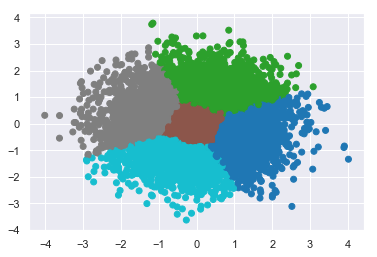

In [204]:
data_1 = np.random.normal(0, 1, (10000, 2))
kmeans = Kmeans(k=5, method='rng')
kmeans.fit(data_1)
y_kmeans = kmeans.predict(data_1)

plt.scatter(data_1[:, 0], data_1[:, 1], c=y_kmeans, cmap="tab10")

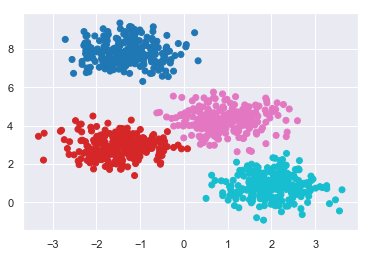

In [211]:
kmeans = Kmeans(k=4, method='rng')
kmeans.fit(data_2)
y_kmeans = kmeans.predict(data_2)

plt.scatter(data_2[:, 0], data_2[:, 1], c=y_kmeans, cmap="tab10")

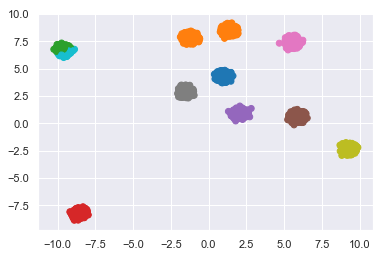

In [212]:
kmeans = Kmeans(k=10, method='rng')
kmeans.fit(data_3)
y_kmeans = kmeans.predict(data_3)

plt.scatter(data_3[:, 0], data_3[:, 1], c=y_kmeans, cmap="tab10")

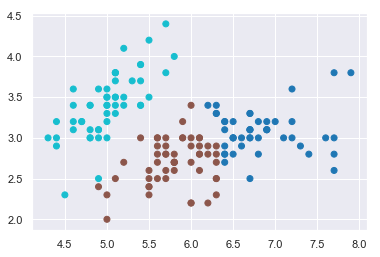

In [214]:
kmeans = Kmeans(k=3, method='rng')
kmeans.fit(data_4)
y_kmeans = kmeans.predict(data_4)

plt.scatter(data_4[:, 0], data_4[:, 1], c=y_kmeans, cmap="tab10")

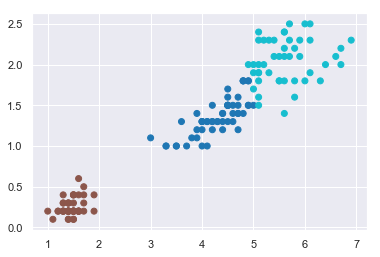

In [216]:
kmeans = Kmeans(k=3, method='rng')
kmeans.fit(data_5)
y_kmeans = kmeans.predict(data_5)

plt.scatter(data_5[:, 0], data_5[:, 1], c=y_kmeans, cmap="tab10")

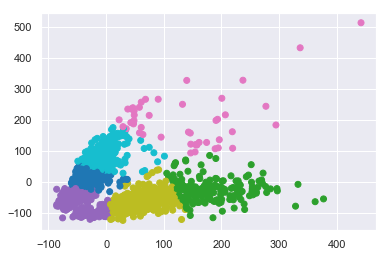

In [218]:
kmeans = Kmeans(k=6, method='rng')
kmeans.fit(data_6)
y_kmeans = kmeans.predict(data_6)

plt.scatter(data_6[:, 0], data_6[:, 1], c=y_kmeans, cmap="tab10")